In [21]:
import numpy as np


DEFINE DATA POINT TO BE FITTED WITH LINEAR MODEL

In [22]:
#DATA POINTS FROM CLASS EXAMPLE
P=np.array([[1,6],[2,5],[3,7],[4,10]])
P

array([[ 1,  6],
       [ 2,  5],
       [ 3,  7],
       [ 4, 10]])

In [23]:
yval=P[:,1]
xval=P[:,0]
yval

array([ 6,  5,  7, 10])

DEFINING A MATRIX

In [24]:
A=[xval,np.ones(len(xval))]
A=np.transpose(A)
A



array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.]])

DEFINING B-MATRIX CONTAINING THE TARGET (OBSERVED)VALUES

In [25]:
b=[yval]
b=np.transpose(b)
b
np.shape(b) #np.shape returns the dimension of the array

(4, 1)

APPLY THE LEAST SQUARES SOLUTION EQUATION

In [26]:
# THE COMMAND FOR INVERSING IS linalg.inv(matrix) means linear algebra matrix inverse
# x= (At*A)^-1 * At * b
x=np.matmul(np.matmul(np.linalg.inv(np.matmul((np.transpose(A)),A)),np.transpose(A)),b)
                                     #   y=np.matmul(x,A) FOR MATRIX MULTIPLICATION 
np.shape(x)  # to check
m=x[0]
print(m)
C=x[1]
C

[1.4]


array([3.5])

APPLY THE MODEL TO THE X VALUES TO TEST THE MODEL

In [27]:
model=m*xval+C
model

array([4.9, 6.3, 7.7, 9.1])

VISUALISE DATA POINTS AND MODEL

No handles with labels found to put in legend.


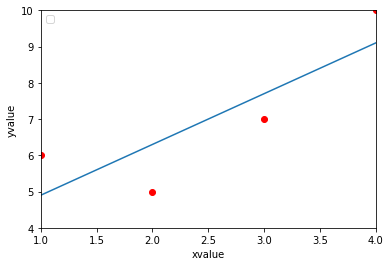

In [53]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(xval,model)
plt.plot(xval,yval,'ro')  
plt.axis([1,4,4,10]) #the axis gives the value on the axis(xmin,xmax,ymin,ymax)
plt.xlabel("xvalue")
plt.ylabel("yvalue")
plt.legend()
plt.show()

ASSESS THE MODEL ACCURACY

In [29]:
v=b-np.matmul(A,x) #matrix multipilcation its always the coloumn of the 1st matrix to the row of the second matrix and resulting will be a m*q 
np.shape(v) 
v
G=np.cov(np.transpose(np.matmul(A,x)))
G

array(3.26666667)

RMS ERROR 

In [30]:
avg=np.mean(v*v)
rms= np.sqrt(avg)
rms

1.02469507659596

COMPUTING STANDARD ERROR

In [31]:
number_of_total_points= len(v)
number_of_parameters=len(x)
DOF=number_of_total_points-number_of_parameters
Standard_error=rms/np.sqrt(DOF)
Standard_error

0.724568837309472

COMPUTING STANDARD ERROR USING MATRIX ALGEBRA

In [32]:
Matrix_SE= np.sqrt((np.matmul(np.transpose(v),v))/(number_of_total_points*DOF))
Matrix_SE

array([[0.72456884]])

CORRELATION COEFFICIENT

In [33]:
pdt=np.matmul(A,x)
pdt=np.transpose(pdt)
c=np.transpose(b) ## THE COVARIENCE IN PYTHON WORKS INA SINGLE ARRAY SO WE NEED TO STACK IT UP USING THE VSTACK
rel=np.vstack((pdt,c))
rel
cov=np.cov(rel) 
cov

array([[3.26666667, 3.26666667],
       [3.26666667, 4.66666667]])

CORRELATION COEFFFICIENT

In [34]:
r=cov[0,1]/(np.sqrt(cov[0,0]*cov[1,1]))
r

0.8366600265340757

R SQUARED

In [35]:
r2=r**2  ## to raise to a poer use **
r2

0.7000000000000002